Import libraries and packages

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,  mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import data as a dataframe

In [6]:
df = pd.read_csv(r"C:\Users\ACER\Desktop\ML_project\src\notebook\stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
X = df.drop(columns = ['math_score'], axis = 1)
y = df['math_score']

Create column transformer

In [10]:
# Create pipeline
num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include = "object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [14]:
X.shape

(1000, 19)

Training and testing data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

Evaluation function

In [22]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

Evaluating model on various algorithms

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-neighbors": KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "XGBRegressor": XGBRegressor(),
    "Catboost regressor": CatBoostRegressor(verbose = False),
    "Adaboost regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae, model_train_rmse, model_train_r2_square = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2_square = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for training: ")
    print(f"Mean absolute error: {model_train_mae}")
    print(f"Root mean squared error: {model_train_rmse}")
    print(f"R2 score: {model_train_r2_square}")
    
    print("-------------------")
    
    print("Model performance for testing: ")
    print(f"Mean absolute error: {model_test_mae}")
    print(f"Root mean squared error: {model_test_rmse}")
    print(f"R2 score: {model_test_r2_square}")
    
    r2_list.append(model_test_r2_square)
    
    
    print("="*35)
    print('\n')

Linear Regression
Model performance for training: 
Mean absolute error: 4.266711846071957
Root mean squared error: 5.323050852720514
R2 score: 0.8743172040139593
-------------------
Model performance for testing: 
Mean absolute error: 4.214763142474852
Root mean squared error: 5.393993869732845
R2 score: 0.8804332983749564


Lasso
Model performance for training: 
Mean absolute error: 5.206302661246526
Root mean squared error: 6.593815587795566
R2 score: 0.8071462015863456
-------------------
Model performance for testing: 
Mean absolute error: 5.157881810347763
Root mean squared error: 6.519694535667421
R2 score: 0.8253197323627852


Ridge
Model performance for training: 
Mean absolute error: 4.264987823725982
Root mean squared error: 5.323324922741654
R2 score: 0.8743042615212909
-------------------
Model performance for testing: 
Mean absolute error: 4.211100688014259
Root mean squared error: 5.390387016935638
R2 score: 0.8805931485028738


K-neighbors
Model performance for training:

Results

In [26]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model name', 'R2 Score']).sort_values(by = ["R2 Score"], ascending = False)

,Model name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
6,Catboost regressor,0.851632
7,Adaboost regressor,0.847479
5,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-neighbors,0.784030
4,Decision Tree,0.759676


Linear Regression

In [29]:
lin_model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model: ", score)

Accuracy of the model:  84.79191726281448


Plotting

Text(0, 0.5, 'Predicted')

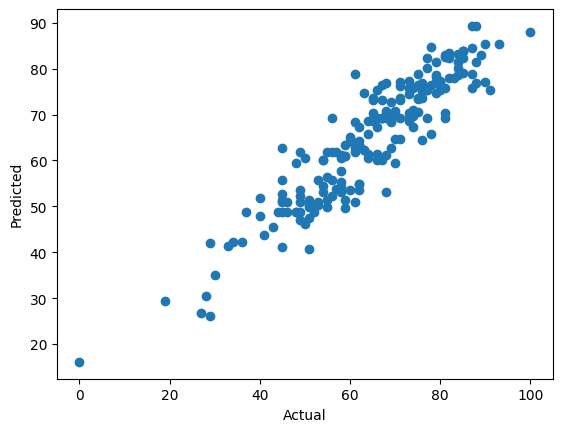

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

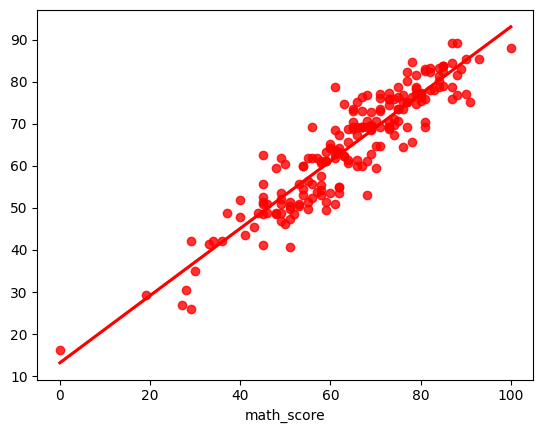

In [31]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="red")

Difference between actual and predicted values

In [32]:
pred_df = pd.DataFrame({"Actual value: ":y_test, "Predicted value: ":y_pred, "Difference: ":y_test-y_pred})
pred_df

,Actual value:,Predicted value:,Difference:
521,91,75.281369,15.718631
737,53,55.656977,-2.656977
740,80,77.011429,2.988571
660,74,75.778281,-1.778281
411,84,81.405063,2.594937
...,...,...,...
408,52,48.668478,3.331522
332,62,53.632653,8.367347
208,74,67.376471,6.623529
613,65,68.680328,-3.680328
